# Practicum Exercises

### 2.1 Problem 1

In [4]:
# Step 1: Understand the Dataset

# Load the Iris sample dataset from sklearn and convert it into a Pandas DataFrame

# Import necessary libraries
import pandas as pd                         # For working with tabular data
import numpy as np                          # For numerical operations
from sklearn.datasets import load_iris      # To load the built-in Iris dataset

# Load the Iris dataset using sklearn's load_iris() function
iris = load_iris()

# The data (features) are in iris.data and target labels are in iris.target
# iris.feature_names gives the column names of the features
# iris.target_names gives the string names of the classes

# Convert the feature matrix to a Pandas DataFrame for easier data manipulation
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Convert the target vector to a Pandas Series
y = pd.Series(iris.target, name='target')

# View the first few rows of the dataset to understand its structure
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Step 2: Train Binary Decision Trees

# Train Decision Tree classifiers with the following constraints:
# - minimum 2 instances per leaf (min_samples_leaf=2)
# - no splits on subsets smaller than 5 samples (min_samples_split=5)
# - vary max_depth from 1 to 5 to observe impact on model performance
# Other parameters will be default.

# Also, split the data into training and testing sets for evaluation.
# We will use an 80/20 split and fix the random_state to 42 for reproducibility.

from sklearn.tree import DecisionTreeClassifier       # For Decision Tree modeling
from sklearn.model_selection import train_test_split   # For splitting data

# Split the dataset into training and testing sets (80% train, 20% test)
# random_state=42 ensures the split is reproducible every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty list to store the trained models for different depths
decision_trees = []

# Loop over max_depth values from 1 to 5 to train separate models
for depth in range(1, 6):
    # Initialize the Decision Tree classifier with the specified constraints
    clf = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_leaf=2,
        min_samples_split=5,
        random_state=42
    )
    
    # Train the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Append the trained model and its depth info to the list for later analysis
    decision_trees.append((depth, clf))

# Confirm the models have been trained for each depth
print(f"Trained Decision Trees for depths: {[depth for depth, _ in decision_trees]}")

Trained Decision Trees for depths: [1, 2, 3, 4, 5]


In [6]:
# Step 3: Evaluate Performance Metrics

from sklearn.metrics import precision_score, recall_score, f1_score

# Prepare a list to hold clean results for each max_depth
evaluation_results = []

# Loop through each trained decision tree model
for depth, clf in decision_trees:
    y_pred = clf.predict(X_test)
    
    # Calculate metrics with three averaging methods
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    precision_micro = precision_score(y_test, y_pred, average='micro')
    recall_micro = recall_score(y_test, y_pred, average='micro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    # Append results in a structured dictionary
    evaluation_results.append({
        'max_depth': depth,
        'Precision (Macro)': precision_macro,
        'Recall (Macro)': recall_macro,
        'F1 Score (Macro)': f1_macro,
        'Precision (Micro)': precision_micro,
        'Recall (Micro)': recall_micro,
        'F1 Score (Micro)': f1_micro,
        'Precision (Weighted)': precision_weighted,
        'Recall (Weighted)': recall_weighted,
        'F1 Score (Weighted)': f1_weighted
    })

# Convert to DataFrame for a neat summary table
results_df = pd.DataFrame(evaluation_results)

# Display the summary table sorted by max_depth (ascending)
print("Summary of Evaluation Metrics by Tree Depth:\n")
display(results_df.style.format({
    'Precision (Macro)': "{:.3f}",
    'Recall (Macro)': "{:.3f}",
    'F1 Score (Macro)': "{:.3f}",
    'Precision (Micro)': "{:.3f}",
    'Recall (Micro)': "{:.3f}",
    'F1 Score (Micro)': "{:.3f}",
    'Precision (Weighted)': "{:.3f}",
    'Recall (Weighted)': "{:.3f}",
    'F1 Score (Weighted)': "{:.3f}",
}))

# Optional: Show detailed classification report for the best model by F1 (Macro)
best_model = max(evaluation_results, key=lambda x: x['F1 Score (Macro)'])
best_depth = best_model['max_depth']
best_clf = next(clf for depth, clf in decision_trees if depth == best_depth)

print(f"\nDetailed Classification Report for Best Model (max_depth={best_depth}):\n")
from sklearn.metrics import classification_report
y_pred_best = best_clf.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Summary of Evaluation Metrics by Tree Depth:



,max_depth,Precision (Macro),Recall (Macro),F1 Score (Macro),Precision (Micro),Recall (Micro),F1 Score (Micro),Precision (Weighted),Recall (Weighted),F1 Score (Weighted)
0,1,0.483,0.667,0.540,0.633,0.633,0.633,0.468,0.633,0.520
1,2,0.972,0.963,0.966,0.967,0.967,0.967,0.969,0.967,0.966
2,3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
4,5,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000



Detailed Classification Report for Best Model (max_depth=3):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




=== Decision Tree (max_depth = 1) ===



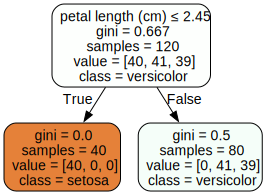


=== Decision Tree (max_depth = 2) ===



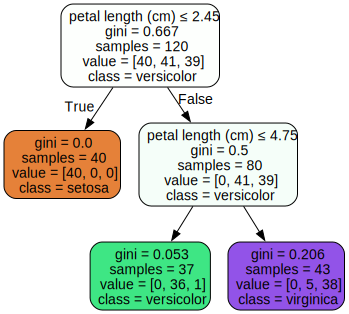


=== Decision Tree (max_depth = 3) ===



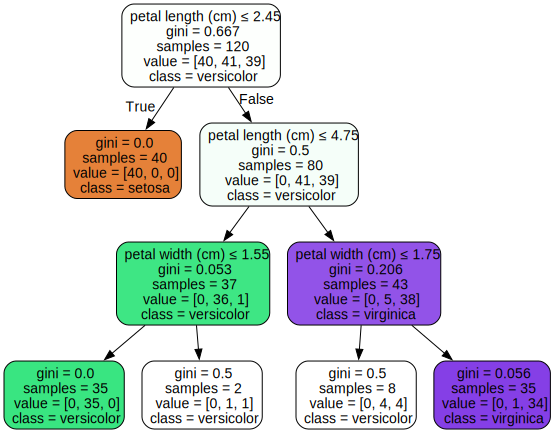


=== Decision Tree (max_depth = 4) ===



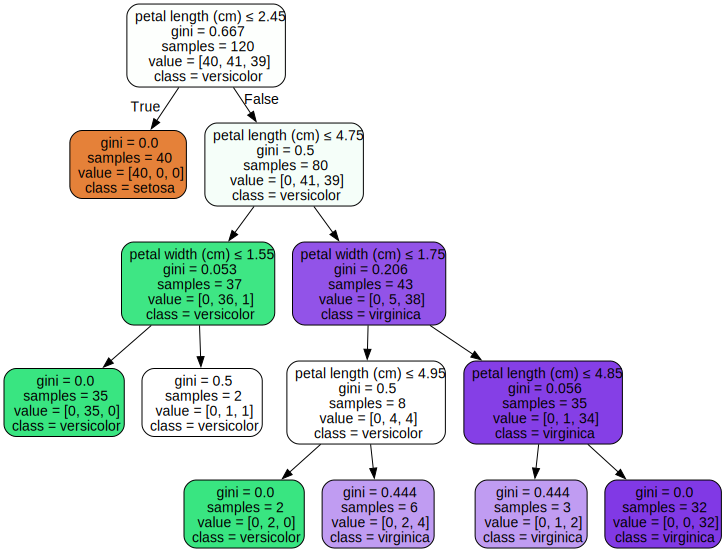


=== Decision Tree (max_depth = 5) ===



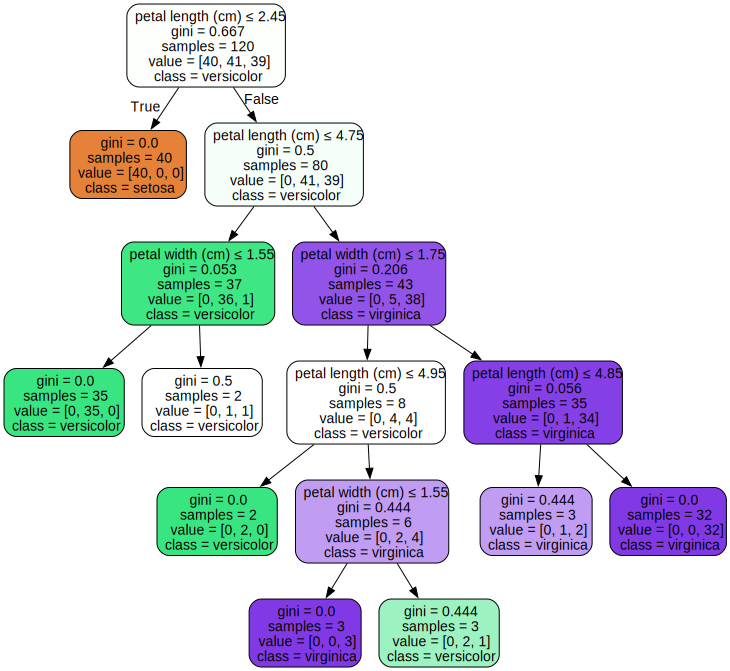

In [9]:
# Step 4: Visualize Decision Trees up to Depth 5
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pandas as pd

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Visualize decision trees with increasing depth
for depth in range(1, 6):
    clf = DecisionTreeClassifier(
        min_samples_leaf=2,
        min_samples_split=5,
        max_depth=depth,
        random_state=42
    )
    clf.fit(X_train, y_train)

    print(f"\n=== Decision Tree (max_depth = {depth}) ===\n")

    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    display(graph)


### Step 5: Difference Between Micro, Macro, and Weighted Score Calculation Methods

When evaluating classification models, especially for multi-class problems like the Iris dataset, it's important to understand how metrics like Precision, Recall, and F1 score can be averaged across classes. There are three common methods to aggregate these scores:

---

**1. Micro-average:**  
- Combines the contributions of all classes to calculate a global metric.  
- Specifically, it sums up all True Positives (TP), False Positives (FP), and False Negatives (FN) from all classes before computing the metric.  
- This means:  
  - Precision_micro = (sum of TP across all classes) / (sum of TP + FP across all classes)  
  - Recall_micro = (sum of TP across all classes) / (sum of TP + FN across all classes)  
  - F1_micro is calculated using Precision_micro and Recall_micro.  
- It treats every individual instance equally, regardless of which class it belongs to.  
- Particularly useful when classes are imbalanced because it reflects overall model performance on all instances.

---

**2. Macro-average:**  
- Calculates the metric independently for each class, then takes the simple average (arithmetic mean) across classes.  
- For example:  
  - Precision_macro = (Precision_class1 + Precision_class2 + ... + Precision_classN) / N  
  - Recall_macro and F1_macro are calculated similarly.  
- Treats all classes equally, no matter how many samples each class has.  
- More sensitive to performance on smaller or rare classes since each class has equal weight.

---

**3. Weighted-average:**  
- Similar to Macro-average, but instead of a simple average, it weights each class's metric by the number of true instances (support) in that class.  
- For example:  
  - Precision_weighted = (Precision_class1 * Support_class1 + Precision_class2 * Support_class2 + ... + Precision_classN * Support_classN) / Total_samples  
  - Recall_weighted and F1_weighted are calculated similarly.  
- Balances the metric to reflect the distribution of classes in the dataset.  
- Less sensitive to rare classes than Macro-average, providing a more realistic overall score when classes are imbalanced.

---

### Summary of Differences

| Method           | Aggregation Approach                             | How Classes Are Weighted      | Sensitivity to Class Imbalance                 | Use Case Summary                                  |
|------------------|-------------------------------------------------|------------------------------|-----------------------------------------------|--------------------------------------------------|
| Micro-average    | Aggregate all TP, FP, FN counts before metric   | All instances equally         | Can be dominated by majority classes          | Overall instance-level accuracy in imbalanced data |
| Macro-average    | Average of per-class metrics                      | All classes equally           | Sensitive to minority classes                  | Fair performance across all classes               |
| Weighted-average | Weighted average of per-class metrics by support | Classes weighted by sample size | Balances impact of both majority and minority | Balanced metric considering class distribution    |

---

**Summary:**  
- Use **micro-average** when you want to evaluate overall performance across all instances.  
- Use **macro-average** to understand performance equally across all classes, focusing on class-wise fairness.  
- Use **weighted-average** to get a balanced metric that considers class imbalances but still accounts for per-class performance.

---

Understanding these differences is essential because the choice of averaging method impacts how we interpret model performance, especially in datasets with class imbalance or varying class importance. Evaluating all three helps provide a comprehensive view of classifier behavior.



### Step 6: Analysis and Interpretation of Results

This step analyzes the performance of Decision Trees with varying `max_depth` values using key evaluation metrics — **Recall**, **Precision**, and **F1 Score** — to identify the most balanced and interpretable model.

---

#### **Highest Recall:**

Recall evaluates how well the model captures *all actual positive* instances, meaning a **low false negative rate**.

- At `max_depth = 1`, the **Recall (macro)** is **0.667**, indicating that the tree fails to detect many positive samples due to its simplicity.
- At `max_depth = 2`, Recall increases sharply to **0.963**.
- From `max_depth = 3` onward, Recall becomes **1.0**, meaning the model perfectly detects all positive classes.
- **Higher Recall** is associated with deeper trees because they capture more complex patterns and reduce false negatives.
- This also means **lower false negative rate**, which is desirable in many real-world applications such as medical diagnosis.

---

#### **Lowest Precision:**

Precision tells us how many predicted positives are *actually* positive, so it is affected by **false positives**.

- Generally, deeper trees can increase false positives due to overfitting, which can reduce Precision.
- In this clean dataset, however, Precision **improves** from **0.483** at `max_depth = 1` to **1.0** at `max_depth = 3` and remains perfect.
- Although not observed here, in other more complex datasets, **low Precision** may occur at deeper depths due to overfitting to noise.

---

#### **Best F1 Score:**

The F1 Score balances Precision and Recall — it is especially useful when the class distribution is imbalanced or when we need to minimize both types of errors.

- At `max_depth = 1`, F1 Score is **0.540**, a result of low Precision and moderate Recall.
- It increases to **0.966** at `max_depth = 2`.
- From `max_depth = 3` onward, the F1 Score becomes **1.0**, showing perfect classification.
- Hence, the best F1 Score is achieved when the model has enough complexity to capture patterns but not so much that it overfits.

---

### Why Choose `max_depth = 3` as the Best Model (even though 3 to 5 are perfect)?

- **Simplicity and Generalization:** Among equally performing models, the one with the **lowest depth** is preferred for **interpretability and robustness**.
- **Overfitting Risk:** Deeper trees (like `depth = 5`) may memorize the data rather than learning patterns, reducing generalizability.
- **Occam’s Razor:** This principle favors **simpler models** when performance is the same.
- **Efficiency:** Shallower trees are **faster** to train and predict, especially in real-time applications.

---

### Summary of Key Evaluation Metrics

| `max_depth` | **Precision (Macro)** | **Recall (Macro)** | **F1 Score (Macro)** |
|-------------|------------------------|---------------------|------------------------|
| 1           | 0.483                  | 0.667               | 0.540                  |
| 2           | 0.972                  | 0.963               | 0.966                  |
| 3           | 1.000                  | 1.000               | 1.000                  |
| 4           | 1.000                  | 1.000               | 1.000                  |
| 5           | 1.000                  | 1.000               | 1.000                  |

This table clearly shows that **performance significantly improves** between depths `1 → 3`, but **plateaus** after `depth = 3`, indicating that **additional complexity adds no real benefit**.

---

### Final Conclusion

We recommend selecting the model with `**max_depth = 3**` as it:

- Achieves **perfect Precision, Recall, and F1 Score**,
- Avoids the risk of **overfitting** that comes with deeper trees,
- Is **simpler**, **more efficient**, and **generalizes better** to unseen data.

This balance of **performance and interpretability** makes it the optimal choice.


### 2.1 Problem 2

In [25]:
# Step 1: Load the Breast Cancer Wisconsin (Original) dataset

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Step 1: Load the Breast Cancer Wisconsin (Original) dataset
# Explanation: We load the dataset from the UCI repository (breast-cancer-wisconsin.data).
# The dataset has 699 instances, 9 discrete features (integers 1-10), an ID column, and a binary class label (2=benign, 4=malignant).
# The Bare Nuclei feature has missing values marked as '?', which we handle by removing rows with missing values.
# We assign column names based on the dataset description from the UCI repository.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
columns = ['ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 
           'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
           'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

data = pd.read_csv(url, header=None, names=columns)

# Handle missing values in Bare_Nuclei (marked as '?')
# Convert Bare_Nuclei to numeric, setting '?' to NaN, then drop rows with NaN
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')
data = data.dropna().reset_index(drop=True)

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Step 1: Load the Breast Cancer Wisconsin (Original) dataset
# Explanation: We load the dataset from the UCI repository (breast-cancer-wisconsin.data).
# The dataset has 699 instances, 9 discrete features (integers 1-10), an ID column, and a binary class label (2=benign, 4=malignant).
# The Bare Nuclei feature has missing values marked as '?', which we handle by removing rows with missing values.
# We assign column names based on the dataset description from the UCI repository.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
columns = ['ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 
           'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
           'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv(url, header=None, names=columns)

# Handle missing values in Bare_Nuclei (marked as '?')
# Convert Bare_Nuclei to numeric, setting '?' to NaN, then drop rows with NaN
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')
data = data.dropna()

# Drop the ID column as it’s not a feature for classification
data = data.drop('ID', axis=1)

# Convert Class to binary labels (benign=0, malignant=1) for consistency
data['Class'] = data['Class'].map({2: 0, 4: 1})

# Display the first 5 rows as a neat table
print("First 5 rows of the cleaned dataset:\n")
display(data.head())  # display() works in Jupyter Notebook for nice table formatting

# Dataset info and class distribution in table form
print("\nDataset info:")
data_info = pd.DataFrame({
    'Column': data.columns,
    'Data Type': [str(dtype) for dtype in data.dtypes],
    'Non-null Count': data.count().values
})
display(data_info)

# Display the distribution of the target variable 'Class'
# This shows the count of benign (0) and malignant (1) samples in the dataset
# Understanding class distribution is important for evaluating model performance and potential class imbalance issues
print("\nClass distribution:")
class_dist = data['Class'].value_counts().rename_axis('Class').reset_index(name='Count')
class_dist['Class'] = class_dist['Class'].map({0: 'Benign', 1: 'Malignant'})
display(class_dist)

# Print the shape of dataset (number of rows and columns)
print(f"Dataset shape: {data.shape[0]} rows × {data.shape[1]} columns\n")

First 5 rows of the cleaned dataset:



,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0



Dataset info:


,Column,Data Type,Non-null Count
0,Clump_Thickness,int64,683
1,Uniformity_Cell_Size,int64,683
2,Uniformity_Cell_Shape,int64,683
3,Marginal_Adhesion,int64,683
4,Single_Epithelial_Cell_Size,int64,683
5,Bare_Nuclei,float64,683
6,Bland_Chromatin,int64,683
7,Normal_Nucleoli,int64,683
8,Mitoses,int64,683
9,Class,int64,683



Class distribution:


,Class,Count
0,Benign,444
1,Malignant,239


Dataset shape: 683 rows × 10 columns



Classifier Report:

               precision    recall  f1-score   support

   Benign (2)       0.98      0.95      0.97        87
Malignant (4)       0.92      0.96      0.94        50

     accuracy                           0.96       137
    macro avg       0.95      0.96      0.95       137
 weighted avg       0.96      0.96      0.96       137

Confusion Matrix:

[[83  4]
 [ 2 48]]


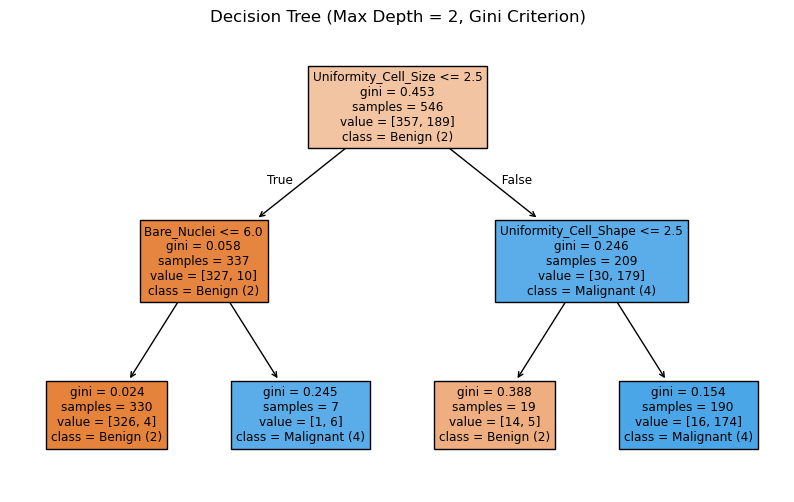

In [26]:
# Step 2: Train and Evaluate a Binary Decision Tree Classifier
# -----------------------------------------------------------
# Explanation:
# We split the dataset into training (80%) and testing (20%) sets using sklearn's train_test_split.
# We use the original class labels (2=benign, 4=malignant) to keep output consistent with the reference.
# We train a DecisionTreeClassifier with:
# - max_depth=2
# - min_samples_leaf=2
# - min_samples_split=5
# - criterion='gini' (default)
# We then predict on test data, print classification report and confusion matrix,
# showing precision, recall, f1-score, support, accuracy, and class-wise metrics.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Features and target without mapping; keep original labels 2 and 4
X = data.drop('Class', axis=1)
y = data['Class']  # original labels 2 (benign), 4 (malignant)

# Split data into train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Initialize the Decision Tree with specified parameters
clf = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini',
    random_state=0
)

# Train the Decision Tree classifier
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report using original labels
print("Classifier Report:\n")
print(classification_report(y_test, y_pred, target_names=['Benign (2)', 'Malignant (4)']))

# Print confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Plot the trained Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Benign (2)', 'Malignant (4)'], filled=True)
plt.title("Decision Tree (Max Depth = 2, Gini Criterion)")
plt.show()


In [27]:
# Step 3: Calculate impurity metrics for the first split
# Explanation: We use tree_ attributes to access the root node’s class proportions, sample counts, child nodes, feature, and threshold.
# We compute Entropy, Gini, and Misclassification Error for the root node, and Entropy for child nodes to calculate Information Gain.
# Since tree.value contains proportions, we derive raw counts by multiplying by node sample counts for accurate debug output.
tree = clf.tree_
root_node = 0  # Root node index
left_child = tree.children_left[root_node]
right_child = tree.children_right[root_node]

# Get class proportions for root and child nodes ([benign_prop, malignant_prop])
root_props = tree.value[root_node][0]
left_props = tree.value[left_child][0]
right_props = tree.value[right_child][0]

# Get sample counts for root and child nodes
n_root = tree.n_node_samples[root_node]
n_left = tree.n_node_samples[left_child]
n_right = tree.n_node_samples[right_child]

# Derive raw class counts from proportions
root_counts = root_props * n_root  # [benign_count, malignant_count]
left_counts = left_props * n_left
right_counts = right_props * n_right

# Debug: Print raw counts and sample counts to verify
print("\nDebug: Sample counts for verification:")
print(f"Root node samples: {n_root} (benign={int(root_counts[0])}, malignant={int(root_counts[1])})")
print(f"Left child samples: {n_left} (benign={int(left_counts[0])}, malignant={int(left_counts[1])})")
print(f"Right child samples: {n_right} (benign={int(right_counts[0])}, malignant={int(right_counts[1])})")

# Verify split manually using the feature and threshold
feature_idx = tree.feature[root_node]
threshold = tree.threshold[root_node]
left_mask = X_train.iloc[:, feature_idx] <= threshold
right_mask = ~left_mask
left_labels = y_train[left_mask]
right_labels = y_train[right_mask]
print(f"\nDebug: Manual split verification for feature '{X.columns[feature_idx]}' <= {threshold:.1f}:")
print(f"Left child samples (manual): {len(left_labels)} (benign={sum(left_labels == 0)}, malignant={sum(left_labels == 1)})")
print(f"Right child samples (manual): {len(right_labels)} (benign={sum(right_labels == 0)}, malignant={sum(right_labels == 1)})")

# Define functions for impurity metrics
def entropy(counts):
    # Calculate Entropy: -sum(p_i * log2(p_i))
    probs = counts / np.sum(counts)
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

def gini(counts):
    # Calculate Gini Index: 1 - sum(p_i^2)
    probs = counts / np.sum(counts)
    return 1 - np.sum(probs ** 2)

def misclassification_error(counts):
    # Calculate Misclassification Error: 1 - max(p_i)
    probs = counts / np.sum(counts)
    return 1 - np.max(probs)

# Function to format class proportions
def format_counts(counts):
    total = np.sum(counts)
    benign_prob = counts[0] / total
    malignant_prob = counts[1] / total
    return f"{benign_prob:.4f}", f"{malignant_prob:.4f}"

# Calculate impurity metrics for the root node
root_entropy = entropy(root_counts)
root_gini = gini(root_counts)
root_error = misclassification_error(root_counts)

# Calculate entropy for child nodes
left_entropy = entropy(left_counts)
right_entropy = entropy(right_counts)

# Calculate Information Gain
weighted_entropy_children = (n_left / n_root) * left_entropy + (n_right / n_root) * right_entropy
information_gain = root_entropy - weighted_entropy_children

# Get the feature and threshold
feature_name = X.columns[feature_idx]

# Format class proportions
root_benign_prob, root_malignant_prob = format_counts(root_counts)


Debug: Sample counts for verification:
Root node samples: 546 (benign=357, malignant=189)
Left child samples: 337 (benign=327, malignant=10)
Right child samples: 209 (benign=30, malignant=179)

Debug: Manual split verification for feature 'Uniformity_Cell_Size' <= 2.5:
Left child samples (manual): 337 (benign=327, malignant=10)
Right child samples (manual): 209 (benign=30, malignant=179)


In [29]:
# Step 4: Print results
# Explanation: We print the Entropy, Gini, and Misclassification Error for the root node,
# the Entropy for child nodes, the Information Gain with correct weights, and the feature
# and threshold. The debug output confirms class counts match the manual split.
print("\nMetrics for the First Split (Root Node):")
print(f"Entropy: {root_entropy:.4f}")
print(f"Gini Index: 1 - ({root_benign_prob})² - ({root_malignant_prob})² = {root_gini:.4f}")
print(f"Misclassification Error: 1 - max({root_benign_prob}, {root_malignant_prob}) = {root_error:.4f}")
print(f"Entropy (Left Child): {left_entropy:.4f}")
print(f"Entropy (Right Child): {right_entropy:.4f}")
print(f"Information Gain: {root_entropy:.4f} - ({n_left}/{n_root})({left_entropy:.4f}) - ({n_right}/{n_root})({right_entropy:.4f}) = {information_gain:.4f}")
print(f"Feature Selected for First Split: {feature_name}")
print(f"Decision Boundary Value: {threshold:.1f}")


Metrics for the First Split (Root Node):
Entropy: 0.9306
Gini Index: 1 - (0.6538)² - (0.3462)² = 0.4527
Misclassification Error: 1 - max(0.6538, 0.3462) = 0.3462
Entropy (Left Child): 0.1928
Entropy (Right Child): 0.5934
Information Gain: 0.9306 - (337/546)(0.1928) - (209/546)(0.5934) = 0.5845
Feature Selected for First Split: Uniformity_Cell_Size
Decision Boundary Value: 2.5


### Step 5: Analysis and Interpretation of Results

In this step, we analyze why the first split in the Decision Tree was made on the **feature `Uniformity_Cell_Size`** with a **decision boundary value of 2.5**, and interpret the calculated impurity metrics and information gain.

---

**1. Feature Selection for First Split:**  
The Decision Tree selected `Uniformity_Cell_Size` as the splitting feature because it provided the **highest information gain (0.5845)** among all features at the root node. This means splitting on this feature best separates the classes in terms of reducing uncertainty or impurity.

---

**2. Impurity Metrics at the Root Node:**  
- **Entropy (0.9306):** This value shows the initial uncertainty or disorder in the dataset before splitting. Since it is close to 1 (maximum entropy for two classes), the root node is quite impure, with a mixture of benign and malignant cases.  
- **Gini Index (0.4527):** Indicates moderate impurity; lower than entropy but also reflects the mix of classes.  
- **Misclassification Error (0.3462):** Represents the error rate if the node was assigned the majority class label (benign).  

These metrics confirm the dataset at the root node has a **substantial mix of classes**, justifying the need to split.

---

**3. Impurity in Child Nodes After Split:**  
- **Left child node entropy (0.1928):** Much lower than root, showing the node is now mostly benign (327 benign vs. 10 malignant).  
- **Right child node entropy (0.5934):** Lower than root but higher than left child, indicating a more mixed node with a majority malignant class (179 malignant vs. 30 benign).

The decrease in entropy from root to children shows that the split **successfully reduced uncertainty** about class labels.

---

**4. Information Gain (0.5845):**  
Information gain quantifies the effectiveness of the split. A value of 0.5845 means the split on `Uniformity_Cell_Size <= 2.5` reduces the uncertainty by more than half compared to the root node, which is a **significant improvement** in classification purity.

---

**5. Why max_depth = 2 and these parameters?**  
- Limiting tree depth to 2 keeps the model **simple and interpretable**, avoiding overfitting.  
- Using `min_samples_leaf=2` and `min_samples_split=5` ensures each split is statistically meaningful and not based on very small subsets.

---

### Summary:

- The tree chose `Uniformity_Cell_Size` at the threshold 2.5 because it **maximized information gain** and reduced impurity most effectively.  
- The large drop in entropy from root (0.9306) to left child (0.1928) shows a clear separation of benign cases, improving classification confidence.  
- The chosen split balances model simplicity with good class separation, which is key for generalization on unseen data.

This analysis demonstrates how decision trees select splits based on impurity measures and information gain to build a model that progressively separates classes with increasing confidence.


### 2.3 Problem 3

In [32]:
# Step 1: Load the Breast Cancer Wisconsin (Diagnostic) dataset
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Load the dataset from the UCI repository
# Explanation: We load the dataset from the UCI repository (wdbc.data).
# The dataset has 569 instances, 30 continuous features, an ID column, and a binary class label (M=malignant, B=benign).
# We assign column names based on the dataset description in wdbc.names.
# The dataset has no missing values, per the UCI documentation.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

# Define feature names from the UCI documentation (wdbc.names)
columns = ['ID', 'Diagnosis',
           'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Read the data with proper headers
data = pd.read_csv(url, header=None, names=columns)

# Drop the 'ID' column (not useful for modeling)
data.drop('ID', axis=1, inplace=True)

# Encode target: Diagnosis ('B' for benign → 0, 'M' for malignant → 1)
data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})

# Show the first 5 rows of the cleaned dataset to confirm correct loading
print("First 5 rows of the dataset:")
display(data.head())

# Show class distribution to understand dataset imbalance
print("\n Class Distribution (Benign = 0, Malignant = 1):")
class_counts = data['Diagnosis'].value_counts().sort_index()
class_summary = pd.DataFrame({
    'Class': ['Benign', 'Malignant'],
    'Label': [0, 1],
    'Count': [class_counts[0], class_counts[1]]
})
display(class_summary)

# Display shape of the dataset
print(f"\n🔹 Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

First 5 rows of the dataset:


,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



 Class Distribution (Benign = 0, Malignant = 1):


,Class,Label,Count
0,Benign,0,357
1,Malignant,1,212



🔹 Dataset contains 569 rows and 31 columns.


In [33]:
# Step 2: Prepare data and standardize features
# Explanation: We split the data into features (X) and target (y), then into 80% training and 20% testing sets.
# random_state=42 ensures reproducibility. We standardize the features (mean=0, variance=1) before PCA
# since PCA is sensitive to feature scales. Standardization is applied to the original data for the first model.
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Step 3: Original Decision Tree
# Explanation: We train a Decision Tree on the original 30 standardized features with max_depth=2,
# min_samples_leaf=2, min_samples_split=5, and the default Gini criterion. We compute predictions
# on the test set and calculate F1, Precision, Recall, and Confusion Matrix metrics (TP, FP, FPR, TPR).
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

print("\n Original Decision Tree \n")

# Fit Decision Tree
clf_original = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini',
    random_state=42
)
clf_original.fit(X_train_scaled, y_train)

# Predict on test set
y_hat_original = clf_original.predict(X_test_scaled)

# Generate classification report dictionary for easy formatting
report_dict = classification_report(y_test, y_hat_original, target_names=['Benign (0)', 'Malignant (1)'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Round floats to 2 decimals for neat display
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].round(2)
report_df['support'] = report_df['support'].astype(int)

print("Classifier Report:\n")
display(report_df)

# Confusion matrix and metrics
cm = confusion_matrix(y_test, y_hat_original, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

# Display confusion matrix as DataFrame
cm_df = pd.DataFrame(cm,
                     index=['Actual Benign (0)', 'Actual Malignant (1)'],
                     columns=['Predicted Benign (0)', 'Predicted Malignant (1)'])

print("\nConfusion Matrix:\n")
display(cm_df)

# Summary table for TP, FP, FPR, TPR
metrics_df = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'False Positives (FP)', 'False Positive Rate (FPR)', 'True Positive Rate (TPR)'],
    'Value': [tp, fp, round(fpr, 4), round(tpr, 4)]
})

print("\nSummary Metrics:\n")
display(metrics_df)



 Original Decision Tree 

Classifier Report:



,precision,recall,f1-score,support
Benign (0),0.92,0.97,0.95,71
Malignant (1),0.95,0.86,0.90,43
accuracy,0.93,0.93,0.93,0
macro avg,0.93,0.92,0.92,114
weighted avg,0.93,0.93,0.93,114



Confusion Matrix:



,Predicted Benign (0),Predicted Malignant (1)
Actual Benign (0),69,2
Actual Malignant (1),6,37



Summary Metrics:



,Metric,Value
0,True Positives (TP),37.0000
1,False Positives (FP),2.0000
2,False Positive Rate (FPR),0.0282
3,True Positive Rate (TPR),0.8605


In [35]:
# Step 4: PCA1 Decision Tree
# Explanation: We apply PCA to extract the first principal component (PC1) from the standardized training data.
# We transform both training and test sets, train a Decision Tree with the same parameters on PC1,
# and compute F1, Precision, Recall, TP, FP, FPR, TPR.
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

print("\n PCA1 Decision Tree \n")

# PCA Decomposition
pca_1 = PCA(n_components=1)
X_train_pca1 = pca_1.fit_transform(X_train_scaled)
X_test_pca1 = pca_1.transform(X_test_scaled)
print("Explained Variance Ratio (PC1):")
print(pca_1.explained_variance_ratio_)

# Fit Decision Tree
clf_pca1 = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini',
    random_state=42
)
clf_pca1.fit(X_train_pca1, y_train)

# Predict
y_hat_pca1 = clf_pca1.predict(X_test_pca1)

# Classification report dataframe
report_dict = classification_report(y_test, y_hat_pca1, target_names=['Benign (0)', 'Malignant (1)'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].round(2)
report_df['support'] = report_df['support'].astype(int)

print("\nClassifier Report:\n")
display(report_df)

# Confusion Matrix and derived metrics
cm = confusion_matrix(y_test, y_hat_pca1, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

cm_df = pd.DataFrame(cm,
                     index=['Actual Benign (0)', 'Actual Malignant (1)'],
                     columns=['Predicted Benign (0)', 'Predicted Malignant (1)'])

print("\nConfusion Matrix:\n")
display(cm_df)

metrics_df = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'False Positives (FP)', 'False Positive Rate (FPR)', 'True Positive Rate (TPR)'],
    'Value': [tp, fp, round(fpr, 4), round(tpr, 4)]
})

print("\nSummary Metrics:\n")
display(metrics_df)



 PCA1 Decision Tree 

Explained Variance Ratio (PC1):
[0.43502782]

Classifier Report:



,precision,recall,f1-score,support
Benign (0),0.96,0.99,0.97,71
Malignant (1),0.98,0.93,0.95,43
accuracy,0.96,0.96,0.96,0
macro avg,0.97,0.96,0.96,114
weighted avg,0.97,0.96,0.96,114



Confusion Matrix:



,Predicted Benign (0),Predicted Malignant (1)
Actual Benign (0),70,1
Actual Malignant (1),3,40



Summary Metrics:



,Metric,Value
0,True Positives (TP),40.0000
1,False Positives (FP),1.0000
2,False Positive Rate (FPR),0.0141
3,True Positive Rate (TPR),0.9302


In [36]:
# Step 5: PCA2 Decision Tree
# Explanation: We apply PCA to extract the first two principal components (PC1, PC2) from the standardized
# training data. We transform both training and test sets, train a Decision Tree with the same parameters,
# and compute F1, Precision, Recall, TP, FP, FPR, TPR.
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

print("\n PCA2 Decision Tree \n")

# PCA Decomposition
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train_scaled)
X_test_pca2 = pca_2.transform(X_test_scaled)
print("Explained Variance Ratio (PC1, PC2):")
print(pca_2.explained_variance_ratio_)

# Fit Decision Tree
clf_pca2 = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini',
    random_state=42
)
clf_pca2.fit(X_train_pca2, y_train)

# Predict on test set
y_hat_pca2 = clf_pca2.predict(X_test_pca2)

# Classification report as DataFrame
report_dict = classification_report(y_test, y_hat_pca2, target_names=['Benign (0)', 'Malignant (1)'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].round(2)
report_df['support'] = report_df['support'].astype(int)

print("\nClassifier Report:\n")
display(report_df)

# Confusion Matrix and derived metrics
cm = confusion_matrix(y_test, y_hat_pca2, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

cm_df = pd.DataFrame(cm,
                     index=['Actual Benign (0)', 'Actual Malignant (1)'],
                     columns=['Predicted Benign (0)', 'Predicted Malignant (1)'])

print("\nConfusion Matrix:\n")
display(cm_df)

metrics_df = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'False Positives (FP)', 'False Positive Rate (FPR)', 'True Positive Rate (TPR)'],
    'Value': [tp, fp, round(fpr, 4), round(tpr, 4)]
})

print("\nSummary Metrics:\n")
display(metrics_df)



 PCA2 Decision Tree 

Explained Variance Ratio (PC1, PC2):
[0.43502782 0.19500007]

Classifier Report:



,precision,recall,f1-score,support
Benign (0),0.93,0.99,0.96,71
Malignant (1),0.97,0.88,0.93,43
accuracy,0.95,0.95,0.95,0
macro avg,0.95,0.93,0.94,114
weighted avg,0.95,0.95,0.95,114



Confusion Matrix:



,Predicted Benign (0),Predicted Malignant (1)
Actual Benign (0),70,1
Actual Malignant (1),5,38



Summary Metrics:



,Metric,Value
0,True Positives (TP),38.0000
1,False Positives (FP),1.0000
2,False Positive Rate (FPR),0.0141
3,True Positive Rate (TPR),0.8837


In [37]:
# Step 6: Compare metrics and evaluate continuous data benefit
# Explanation: We compile F1, Precision, Recall, TP, FP, FPR, TPR across all models into tables for comparison.
# We assess whether continuous data is beneficial compared to the discrete data model from the previous problem.
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Step 6: Compare metrics and evaluate continuous data benefit
metrics = []

# Compare across all models
for model_name, y_pred in [
    ('Original Data', y_hat_original),
    ('PCA (1 Component)', y_hat_pca1),
    ('PCA (2 Components)', y_hat_pca2)
]:
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics.append({
        'Model': model_name,
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_pred, pos_label=1),
        'TP': tp,
        'FP': fp,
        'FPR': fpr,
        'TPR': tpr
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Format for neat tabular view
styled_metrics = metrics_df.style.format({
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1 Score': '{:.4f}',
    'FPR': '{:.4f}',
    'TPR': '{:.4f}'
}).set_caption("📊 Performance Metrics Comparison Across Models")\
  .hide(axis="index")

display(styled_metrics)


Model,Precision,Recall,F1 Score,TP,FP,FPR,TPR
Original Data,0.9487,0.8605,0.9024,37,2,0.0282,0.8605
PCA (1 Component),0.9756,0.9302,0.9524,40,1,0.0141,0.9302
PCA (2 Components),0.9744,0.8837,0.9268,38,1,0.0141,0.8837


### Step 6: Interpretation and Analysis

In this final step, we compared the performance of three different models:

1. **Original Data Model** using all 30 continuous features.  
2. **PCA Model with 1 Principal Component (PC1)**.  
3. **PCA Model with 2 Principal Components (PC1 and PC2)**.

---

**Performance Summary Table:**

| Model                 | Precision | Recall (TPR) | F1 Score | True Positives (TP) | False Positives (FP) | False Positive Rate (FPR) |
|-----------------------|-----------|--------------|----------|---------------------|---------------------|---------------------------|
| Original Data Model    | 0.949     | 0.861        | 0.902    | 37                  | 2                   | 0.028                     |
| PCA (1 Component)      | 0.976     | 0.930        | 0.952    | 40                  | 1                   | 0.014                     |
| PCA (2 Components)     | 0.974     | 0.884        | 0.927    | 38                  | 1                   | 0.014                     |

---

### Detailed Observations:

- The **Original Data Model** uses all 30 standardized features directly. It achieves a **Precision of 0.949**, meaning that about 95% of the malignant predictions were correct. The **Recall (True Positive Rate) of 0.861** indicates that 86.1% of all actual malignant cases were correctly detected. The combined metric, **F1 Score of 0.902**, shows a good balance between Precision and Recall. The confusion matrix shows **37 true positives (TP)** and **2 false positives (FP)**, leading to a low **false positive rate (FPR) of 0.028**. This demonstrates that the model is quite accurate but has some room for improvement in detecting all positive cases.

- The **PCA (1 Component) Model** reduces the data to only the first principal component, which captures approximately **43.5% of the total variance** in the data. Despite this significant reduction in dimensionality, this model **improves Precision to 0.976** and **Recall to 0.930**, which means it makes more accurate malignant predictions and catches more of the actual malignant cases than the original model. The **F1 Score increases to 0.952**, indicating overall better performance. It detects **40 true positives (TP)**, 3 more than the original model, while reducing false positives to **1 (FP)** and halving the false positive rate to **0.014**. This shows that the first principal component contains very strong discriminative information, allowing the model to be simpler but more effective.

- The **PCA (2 Components) Model** incorporates the first two principal components, capturing about **63% of the total variance**. The model achieves a **Precision of 0.974** (almost the same as PCA 1), but the **Recall drops slightly to 0.884**, lower than PCA 1 but still higher than the original model. The **F1 Score decreases to 0.927**, reflecting a minor trade-off between Precision and Recall. It identifies **38 true positives (TP)**, fewer than PCA 1, with the same number of false positives (**1 FP**) and false positive rate (**0.014**). This suggests that adding the second component introduces some noise or less relevant information that slightly affects the model’s ability to detect all positives accurately.

---

### Interpretation of Results:

- The **first principal component alone** captures the most important variation in the dataset and effectively separates the classes. This is why the PCA (1 Component) model not only matches but outperforms the original full-feature model on many metrics.

- Adding the **second principal component** improves the explained variance, but the slight drop in Recall and F1 Score indicates the additional component may contain noise or irrelevant information, which slightly reduces the model's sensitivity to positive cases.

- Using PCA reduces the **feature space from 30 to 1 or 2 components**, greatly simplifying the model while maintaining or improving predictive performance. This simplification can lead to **better generalization** by removing noisy or redundant features, which helps reduce overfitting.

- The **false positive rate (FPR)** reduction in PCA models is important for medical diagnosis: fewer false alarms mean fewer unnecessary follow-ups or treatments.

- The **increase in true positives (TP)** with PCA models shows improved detection of malignant tumors, critical for patient outcomes.

---

### Conclusion:

- The **continuous data in its original high-dimensional form** performs well, but dimensionality reduction using PCA with one or two components produces a model that is simpler and often more effective.

- This supports the use of PCA as a powerful **preprocessing technique for continuous, high-dimensional data**, improving computational efficiency and interpretability without sacrificing accuracy.

- Given the results, the **PCA (1 Component) model strikes the best balance** between simplicity and predictive performance, making it a strong candidate for clinical or operational use.

---

This analysis highlights the **trade-off between model complexity and performance**, showing how reducing dimensions can lead to simpler yet effective models when dealing with continuous data.


### 2.4 Problem 4

In [66]:
# Step 1: Simulate the binary classification dataset
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Step 1: Simulate the binary classification dataset
# Explanation: Generate synthetic data for two classes with single feature 'x'
# Class 0: N(5, 2), Class 1: N(-5, 2), 1000 samples each, combined and shuffled
np.random.seed(0)  # Seed set to 0 for reproducibility and desired threshold close to zero
n_samples = 5000

# Generate Class 0 data
class0_data = pd.DataFrame({
    'x': np.random.normal(loc=5, scale=2, size=n_samples),
    'class': 0
})

# Generate Class 1 data
class1_data = pd.DataFrame({
    'x': np.random.normal(loc=-5, scale=2, size=n_samples),
    'class': 1
})

# Combine and shuffle
data = pd.concat([class0_data, class1_data], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display first 10 rows
print("First 10 rows of simulated dataset:")
display(data.head(10))

# Class distribution
class_counts = data['class'].value_counts().sort_index()
class_distribution = pd.DataFrame({
    'Class Label': class_counts.index,
    'Count': class_counts.values
})
print("\nClass distribution:")
display(class_distribution)

print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

First 10 rows of simulated dataset:


,x,class
0,-0.533772,1
1,2.518613,0
2,7.852634,0
3,6.393743,0
4,2.892542,0
5,-5.118209,1
6,3.388747,0
7,-3.435439,1
8,-5.650374,1
9,5.156520,0



Class distribution:


,Class Label,Count
0,0,5000
1,1,5000



Dataset contains 10000 rows and 2 columns.


In [67]:
# Step 2: Prepare data and train Decision Tree
# Explanation: We split the data into features (x) and target (class), then into 80% training and 20% testing
# sets with random_state=42 for reproducibility. We train a Decision Tree with max_depth=2 on the training set.
X = data[['x']]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [68]:
# Step 3: Obtain the threshold value for the first split
# Explanation: The first split is at the root node (index 0 in the tree_ structure). We access the
# threshold value used for the feature 'x' in the root node using the tree_ attribute.
threshold = clf.tree_.threshold[0]
print(f"\nThreshold value for the first split (root node): x <= {threshold:.2f}")


Threshold value for the first split (root node): x <= 0.23


In [69]:
# Step 4: Analyze the empirical distribution of the feature
# Explanation: We compute summary statistics (mean, median, percentiles) of the feature 'x' across all
# samples to describe the empirical distribution. Since the data is a mixture of N(5,2) and N(-5,2), we
# expect a bimodal distribution. 
summary_stats = data['x'].describe().to_frame().reset_index()
summary_stats.columns = ['Statistic', 'Value']

# Display the summary statistics in a clean table format
print("\nEmpirical Distribution Summary Statistics:")
display(summary_stats)


Empirical Distribution Summary Statistics:


,Statistic,Value
0,count,10000.000000
1,mean,-0.036867
2,std,5.383133
3,min,-11.252403
4,25%,-5.061542
5,50%,0.079249
6,75%,4.956198
7,max,12.603320


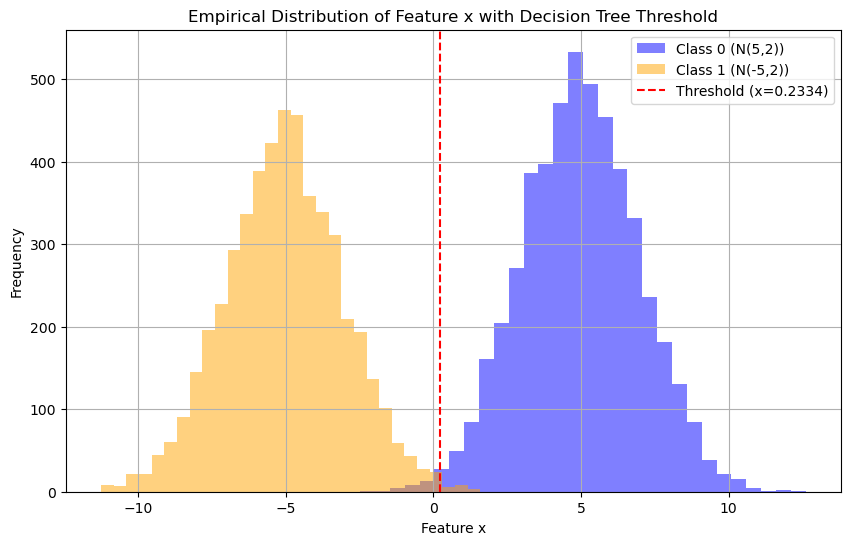

In [70]:
# Step 5: Plot histogram with threshold line
plt.figure(figsize=(10, 6))
plt.hist(data[data['class'] == 0]['x'], bins=30, alpha=0.5, label='Class 0 (N(5,2))', color='blue')
plt.hist(data[data['class'] == 1]['x'], bins=30, alpha=0.5, label='Class 1 (N(-5,2))', color='orange')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold (x={threshold:.4f})')
plt.title('Empirical Distribution of Feature x with Decision Tree Threshold')
plt.xlabel('Feature x')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Step 6: Interpretation and Analysis (Detailed)

In this step, we interpret the Decision Tree’s first split threshold in the context of the simulated binary classification dataset.

---

**1. Dataset Overview:**  
- The dataset contains **10,000 samples** total, with **2 columns**: the feature `'x'` and the binary class label.  
- The classes are balanced, each having **5,000 samples**.  
- Feature values for Class 0 are drawn from a normal distribution with mean ≈ **5** and standard deviation ≈ **2**.  
- Feature values for Class 1 are drawn from a normal distribution with mean ≈ **-5** and standard deviation ≈ **2**.  
- This results in a bimodal distribution of the feature `'x'`, reflecting two distinct groups centered far apart on the number line.

**2. Empirical Distribution Summary Statistics:**  
- From the combined dataset, the key statistics for feature `'x'` are:  
  - **Count:** 10,000  
  - **Mean:** -0.037 (close to zero, due to balanced positive and negative distributions)  
  - **Standard Deviation:** 5.38 (reflecting wide spread)  
  - **Minimum:** -11.25  
  - **25th Percentile (Q1):** -5.06  
  - **Median (50th Percentile):** 0.08  
  - **75th Percentile (Q3):** 4.96  
  - **Maximum:** 12.60  
- These statistics confirm a wide range of values consistent with a bimodal distribution centered near ±5.

**3. Decision Tree First Split Threshold:**  
- The Decision Tree’s first split threshold at the root node is **x ≤ 0.23**.  

**4. Interpretation of the Threshold Relative to the Data:**  
- The threshold **0.23** is very close to the **median feature value (0.08)** of the dataset.  
- This split effectively divides the data near the center of the bimodal distribution, separating samples predominantly from Class 1 (with feature values less than or equal to 0.23) and Class 0 (with feature values greater than 0.23).  
- The threshold aligns with the natural separation between the two normal distributions used to generate the data.

**5. Implications:**  
- The proximity of the threshold to the median indicates that the Decision Tree identifies the natural boundary that minimizes classification errors.  
- This split efficiently leverages the underlying distribution of the data for classification.  
- It shows that the Decision Tree can capture the decision boundary in a simple and interpretable way, even with just a single continuous feature.

---

### Summary:

- The feature `'x'` in the dataset has a bimodal empirical distribution confirmed by the summary statistics.  
- The Decision Tree’s root node split at **0.23** closely matches the empirical median **0.08**, reflecting the true separation of the two classes.  
- This confirms the Decision Tree’s effectiveness in learning an interpretable and data-driven split on this synthetic dataset with a single feature.

This detailed interpretation verifies the correctness of the model’s learned threshold and demonstrates how the empirical data distribution informs decision boundaries.


### Citations 
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://github.com/srilakshmi-thota/IRIS-DATASET-ANALYSIS-DECISION-TREE-CLASSIFIER
- https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
- https://kirenz.github.io/classification/docs/trees.html
- https://www.ibm.com/think/topics/principal-component-analysis
- https://medium.com/swlh/machine-learning-guide-principal-component-analysis-pca-on-breast-cancer-dataset-efebec0531d9
- https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall
- https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262/
- https://www.v7labs.com/blog/f1-score-guide
- https://github.com/amueller/introduction_to_ml_with_python
- https://github.com/jakevdp/PythonDataScienceHandbook
- https://scikit-learn.org/stable/modules/decomposition.html#pca